In [4]:
!pip install locust pandas matplotlib

You should consider upgrading via the '/Users/robert/.pyenv/versions/3.8.12/envs/.venv/bin/python3.8 -m pip install --upgrade pip' command.


# Setup

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from enum import Enum

In [6]:
plt.rcParams["figure.autolayout"] = True

In [7]:
def plot_history(ds, title):
    fig, axes = plt.subplots(2,2,figsize=(8,5))
    for ax in axes.flatten():
        ax.remove()
    ax0 = plt.subplot2grid((2,2), (0,0), colspan=1, fig=fig)
    ax1 = plt.subplot2grid((2,2), (0,1), colspan=1, fig=fig)
    ax3 = plt.subplot2grid((2,2), (1,0), colspan=2, fig=fig)

    fig.suptitle(title, fontsize=16)

    ax0.title.set_text('Total Requests/Failures over time')
    ax0.set_ylabel("Count")
    ds.iloc[:,16:18].plot(ax=ax0)

    ax1.title.set_text('Requests/Failures per second over time')
    ax1.set_ylabel("Count/s")
    ds.iloc[:,3:5].plot(ax=ax1)
    
    ax3.title.set_text('Response Time over time')
    ax3.set_ylabel("Response Time(ms)")
    ax3.set_yscale('log')
    response_time = ds.iloc[:,18:22]
    ax3.set_xlim([response_time.idxmin().min(), response_time.idxmax().max()])
    response_time.plot(ax=ax3)

# Locust

## Localhost

In [142]:
!locust --csv=3m/localhost --headless --users 100 --spawn-rate 100 --run-time 6m -f locustfile.py -H http://0.0.0.0:8080

[2022-11-15 13:33:01,788] RobBookPro.local/INFO/locust.main: Run time limit set to 360 seconds
[2022-11-15 13:33:01,788] RobBookPro.local/INFO/locust.main: Starting Locust 2.13.0
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
         Aggregated       0     0(0.00%) |      0       0       0      0 |    0.00        0.00

[2022-11-15 13:33:01,790] RobBookPro.local/INFO/locust.runners: Ramping to 100 users at a rate of 100.00 per second
[2022-11-15 13:33:01,802] RobBookPro.local/INFO/locust.runners: All users spawned: {"NumericalIntegration": 100} (100 total users)
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-----

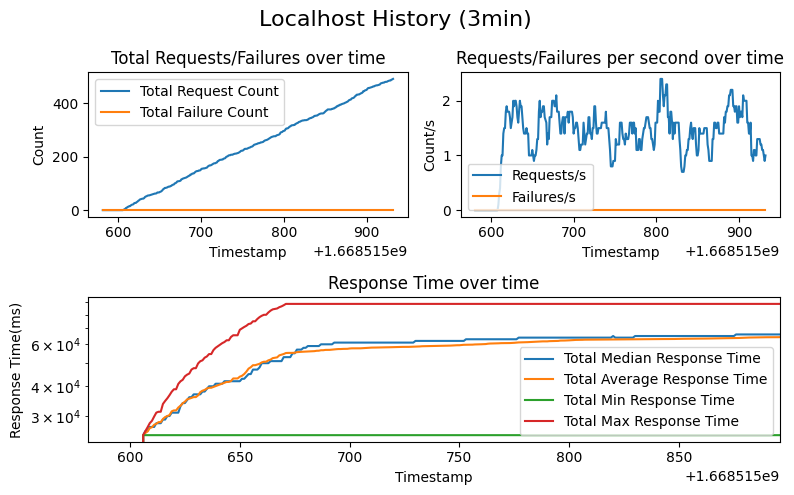

In [18]:
localhost3m = pd.read_csv("3m/localhost_stats_history.csv", index_col=0)
plot_history(localhost3m, "Localhost History (3min)")

## Scalesets

In [166]:
!locust --csv=3m/scalesets --headless --users 100 --spawn-rate 100 --run-time 3m -f locustfile.py -H http://20.19.163.131

[2022-11-22 18:58:16,235] RobBookPro/INFO/locust.main: Run time limit set to 360 seconds
[2022-11-22 18:58:16,235] RobBookPro/INFO/locust.main: Starting Locust 2.13.0
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
         Aggregated       0     0(0.00%) |      0       0       0      0 |    0.00        0.00

[2022-11-22 18:58:16,237] RobBookPro/INFO/locust.runners: Ramping to 100 users at a rate of 100.00 per second
[2022-11-22 18:58:16,250] RobBookPro/INFO/locust.runners: All users spawned: {"NumericalIntegration": 100} (100 total users)
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-------|-------|-------|-----

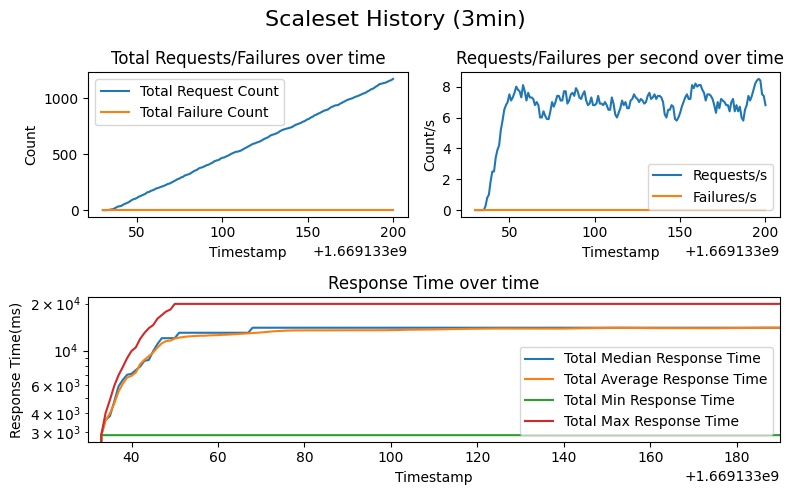

In [9]:
scaleset3m = pd.read_csv("3m/scalesets_stats_history.csv", index_col=0)
plot_history(scaleset3m, "Scaleset History (3min)")

In [ ]:
!locust --csv=6m/scalesets --headless --users 100 --spawn-rate 100 --run-time 6m -f locustfile.py -H http://20.19.163.131

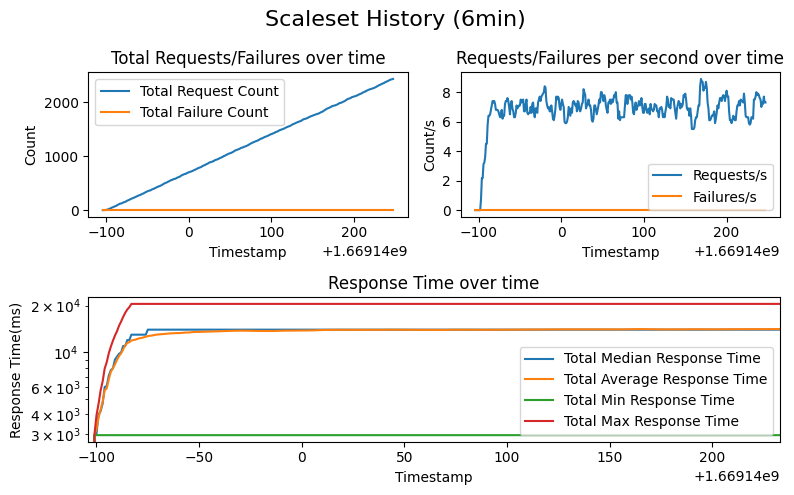

In [8]:
scaleset6m = pd.read_csv("6m/scalesets_stats_history.csv", index_col=0)
plot_history(scaleset6m, "Scaleset History (6min)")

## Webapps

In [175]:
!locust --csv=3m/webapp --headless --users 100 --spawn-rate 100 --run-time 3m -f locustfile.py -H https://roberthmoller-lab2webapp.azurewebsites.net

[2022-11-22 22:03:35,061] RobBookPro/INFO/locust.main: Run time limit set to 180 seconds
[2022-11-22 22:03:35,062] RobBookPro/INFO/locust.main: Starting Locust 2.13.0
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
         Aggregated       0     0(0.00%) |      0       0       0      0 |    0.00        0.00

[2022-11-22 22:03:35,064] RobBookPro/INFO/locust.runners: Ramping to 100 users at a rate of 100.00 per second
[2022-11-22 22:03:35,077] RobBookPro/INFO/locust.runners: All users spawned: {"NumericalIntegration": 100} (100 total users)
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-------|-------|-------|-----

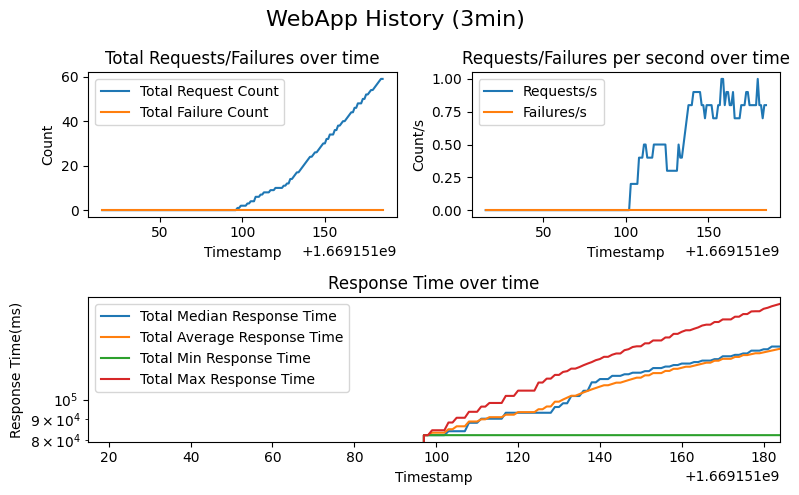

In [10]:
webapp3m = pd.read_csv("3m/webapp_stats_history.csv", index_col=0)
plot_history(webapp3m, "WebApp History (3min)")

In [177]:
!locust --csv=6m/webapp --headless --users 100 --spawn-rate 100 --run-time 6m -f locustfile.py -H https://roberthmoller-lab2webapp.azurewebsites.net

[2022-11-22 22:08:57,827] RobBookPro/INFO/locust.main: Run time limit set to 360 seconds
[2022-11-22 22:08:57,828] RobBookPro/INFO/locust.main: Starting Locust 2.13.0
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
         Aggregated       0     0(0.00%) |      0       0       0      0 |    0.00        0.00

[2022-11-22 22:08:57,830] RobBookPro/INFO/locust.runners: Ramping to 100 users at a rate of 100.00 per second
[2022-11-22 22:08:57,844] RobBookPro/INFO/locust.runners: All users spawned: {"NumericalIntegration": 100} (100 total users)
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-------|-------|-------|-----

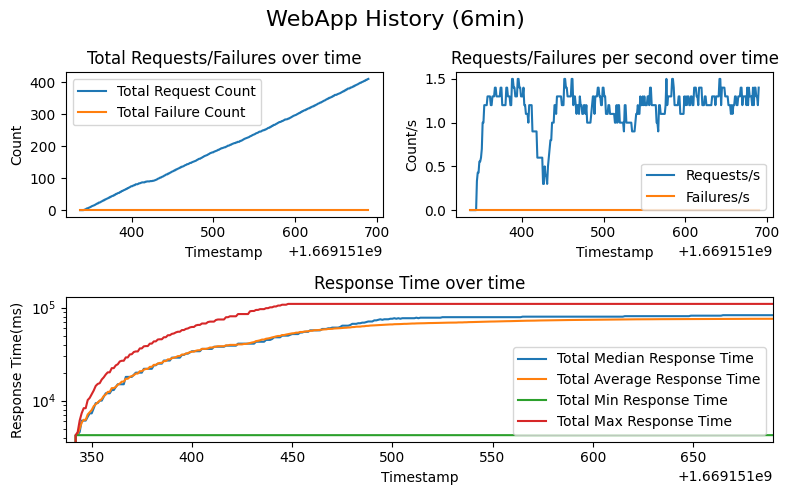

In [11]:
webapp6m = pd.read_csv("6m/webapp_stats_history.csv", index_col=0)
plot_history(webapp6m, "WebApp History (6min)")

## Functions

In [10]:
!locust --csv=3m/function --headless --users 100 --spawn-rate 100 --run-time 3m -f locustfile.py -H https://integral.azurewebsites.net/api

[2022-11-23 15:31:44,476] RobBookPro.local/INFO/locust.main: Run time limit set to 180 seconds
[2022-11-23 15:31:44,476] RobBookPro.local/INFO/locust.main: Starting Locust 2.13.0
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
         Aggregated       0     0(0.00%) |      0       0       0      0 |    0.00        0.00

[2022-11-23 15:31:44,479] RobBookPro.local/INFO/locust.runners: Ramping to 100 users at a rate of 100.00 per second
[2022-11-23 15:31:44,492] RobBookPro.local/INFO/locust.runners: All users spawned: {"NumericalIntegration": 100} (100 total users)
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-----

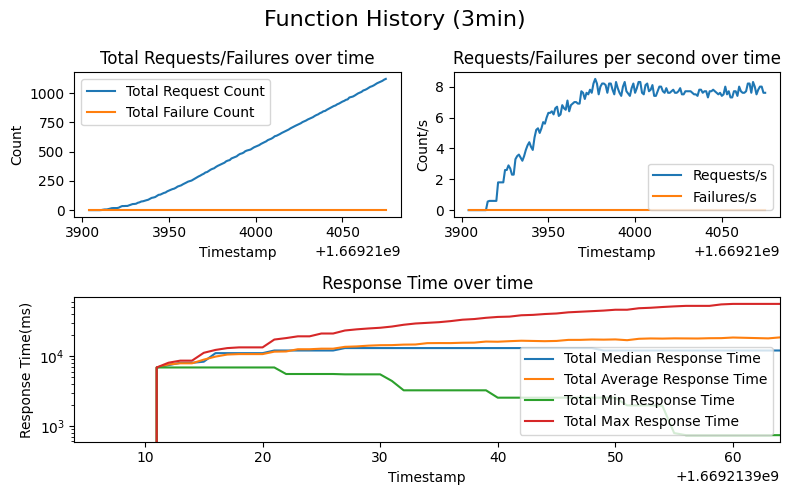

In [12]:
functions3m = pd.read_csv("3m/function_stats_history.csv", index_col=0)
plot_history(functions3m, "Function History (3min)")

In [12]:
!locust --csv=6m/function --headless --users 100 --spawn-rate 100 --run-time 6m -f locustfile.py -H https://integral.azurewebsites.net/api

[2022-11-23 15:35:49,201] RobBookPro.local/INFO/locust.main: Run time limit set to 360 seconds
[2022-11-23 15:35:49,202] RobBookPro.local/INFO/locust.main: Starting Locust 2.13.0
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
         Aggregated       0     0(0.00%) |      0       0       0      0 |    0.00        0.00

[2022-11-23 15:35:49,204] RobBookPro.local/INFO/locust.runners: Ramping to 100 users at a rate of 100.00 per second
[2022-11-23 15:35:49,220] RobBookPro.local/INFO/locust.runners: All users spawned: {"NumericalIntegration": 100} (100 total users)
Type     Name  # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------||-------|-------------|-------|-------|-------|-------|--------|-----------
--------||-------|-------------|-------|-----

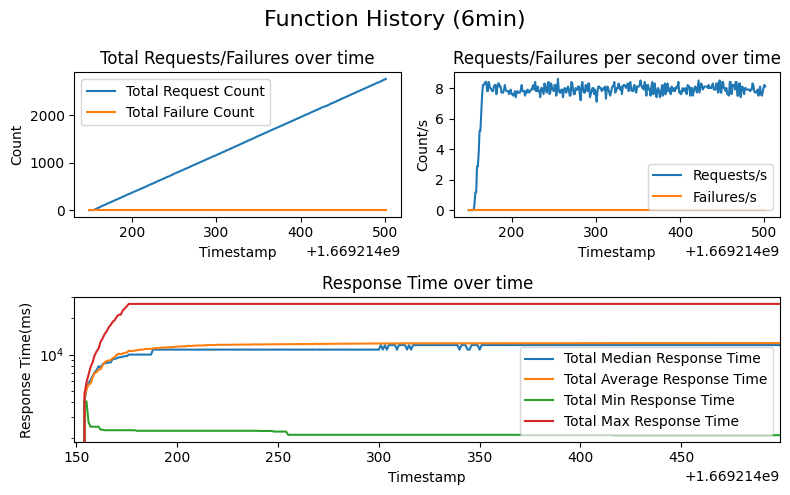

In [13]:
functions6m = pd.read_csv("6m/function_stats_history.csv", index_col=0)
plot_history(functions6m, "Function History (6min)")

# Comparrison

In [26]:
# def plot_history(ds, title):
#     fig, axes = plt.subplots(2,2,figsize=(8,5))
#     for ax in axes.flatten():
#         ax.remove()
#     ax0 = plt.subplot2grid((2,2), (0,0), colspan=1, fig=fig)
#     ax1 = plt.subplot2grid((2,2), (0,1), colspan=1, fig=fig)
#     ax3 = plt.subplot2grid((2,2), (1,0), colspan=2, fig=fig)

#     fig.suptitle(title, fontsize=16)

#     ax0.title.set_text('Total Requests/Failures over time')
#     ax0.set_ylabel("Count")
#     ds.iloc[:,16:18].plot(ax=ax0)

#     ax1.title.set_text('Requests/Failures per second over time')
#     ax1.set_ylabel("Count/s")
#     ds.iloc[:,3:5].plot(ax=ax1)
    
#     ax3.title.set_text('Response Time over time')
#     ax3.set_ylabel("Response Time(ms)")
#     ax3.set_yscale('log')
#     response_time = ds.iloc[:,18:22]
#     ax3.set_xlim([response_time.idxmin().min(), response_time.idxmax().max()])
#     response_time.plot(ax=ax3)

print(list(enumerate(functions6m.columns)))

print(functions6m.loc["Requests/s"])


[(0, 'User Count'), (1, 'Type'), (2, 'Name'), (3, 'Requests/s'), (4, 'Failures/s'), (5, '50%'), (6, '66%'), (7, '75%'), (8, '80%'), (9, '90%'), (10, '95%'), (11, '98%'), (12, '99%'), (13, '99.9%'), (14, '99.99%'), (15, '100%'), (16, 'Total Request Count'), (17, 'Total Failure Count'), (18, 'Total Median Response Time'), (19, 'Total Average Response Time'), (20, 'Total Min Response Time'), (21, 'Total Max Response Time'), (22, 'Total Average Content Size')]


KeyError: 'Request/s'